Lecture 13: Age models part 2

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
nb_list = !jupyter notebook list
server = [l for l in nb_list if 'eos423' in l][0].split(' :: ')[0]
prefix = server.split('?')[0]
token = server.split('?')[1]
notebook = 'Lectures13_AgeModels.ipynb'
url = prefix+'notebooks/'+notebook+'?'+token
!decktape -s '1920x1080' rise $url pdf_slides/Lectures13_AgeModels.pdf

<center><div style="background: url(images/best_fit.png) 50% 20% no-repeat;
  width: 75vw;
  height: 30vh; background-size: 100%;">
</div></center>

# Lecture 13: Age models part 2
1. Building an age model
    - dealing with uncertainty

<div style='font-size:25px'> <i>We acknowledge and respect the lək̓ʷəŋən peoples on whose traditional territory the university stands and the Songhees, Esquimalt and W̱SÁNE&#262; peoples whose historical relationships with the land continue to this day.</i></div>

In [58]:
from matplotlib.patches import Polygon
import scipy.stats as stats
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
import numpy as np

In [59]:
def rando_strat(ax,num_box,height,boxes,liths):
    box_colors= [('#FFB142',0.6),('#33D9B2',0.5),('#34ACE0',0.4),('#706FD3',0.3),('#2C2C54',0.2),('#84817A',0.1)]
    if len(boxes)==0:
        boxes=np.cumsum(np.random.gamma(1,1, num_box))
        boxes=boxes/boxes[-1]*height
        boxes=np.hstack((boxes[0],np.diff(boxes)))
        liths=np.random.randint(0,len(box_colors),num_box)
    stack=0
    trace=[]
    for i,s in enumerate(boxes):
        tmp_w=box_colors[liths[i]][1]
        tmp_color=box_colors[liths[i]][0]
        #add a lithostratigraphy box
        xy=np.array([(0,stack),
                     (0+tmp_w,stack),
                     (0+tmp_w,stack+s),
                     (0,stack+s)])
        rect = Polygon(xy,closed=True,
                      facecolor=tmp_color,edgecolor="k",lw=0.5)
        ax.add_patch(rect)
        #grow the net record
        trace.append((stack,stack+s,tmp_w))
        stack=stack+s
    #set y-limits (from height of this column)
    ax.set_ylim([-0.1,height+0.01*height])
    #set x-limits (section-specific max width of strat box)
    ax.set_xlim([0,1])
    #turn off axes and frame            
    ax.axis('off')
    return ax,np.array(trace),boxes,liths

In [60]:
def calc_age(ash_table,h):
    up=ash_table[(ash_table[:,1])>h][0]
    down=ash_table[(ash_table[:,1])<h][-1]
    sed_rate=(up[1]-down[1])/(down[0]-up[0]) #[1] is height, [0] is age
    
    h_diff=h-down[1]
    h_age=down[0]-h_diff/sed_rate
    
    return(h_age)

ashes={'ash1':{'height':0.1,
            'age': 66.153,
            '2sd':0.029},
       'ash2':{'height':0.83,
            'age': 66.043,
            '2sd':0.031},
       'ash3':{'height':1.6,
            'age': 65.985,
            '2sd':0.011}}
ash_table=np.array([(ashes[a]['age'],ashes[a]['height']) for a in ashes])
KT=0.6 #height in meters

In [61]:
def plot_ash(boxes = [], liths = []):
    fig=plt.figure(1,figsize=(15,6))
    ax=fig.add_subplot(121)
    ax,trace,boxes,liths=rando_strat(ax,num_box=5,height=2,boxes=boxes,liths=liths) #stratigraphy for fun
    #ashes in the strat column
    for a in ashes: 
        tmp_w=trace[(trace[:,0]<=ashes[a]['height']) & (trace[:,1]>ashes[a]['height']),2]
        ax.plot([0,tmp_w],[ashes[a]['height'],ashes[a]['height']],'r--')
    #KT boundary
    tmp_w=trace[(trace[:,0]<=KT) & (trace[:,1]>KT),2]
    ax.plot([0,tmp_w],[KT,KT],'k--')
    ax.text(tmp_w,KT,'  KT boundary',verticalalignment='center',fontsize=20)
    #ash ages
    ax=fig.add_subplot(122)
    for a in ashes:
        ax.plot(ashes[a]['age'],ashes[a]['height'],'rs')
    ax.plot([66.2,65.95],[KT,KT],'k--')
    ax.set_xlim([66.2,65.95]); ax.set_ylim([-0.1,2])
    ax.set_ylabel('meters'); _=ax.set_xlabel('age (Ma)')
    return boxes, liths, fig

##### Building an age model 


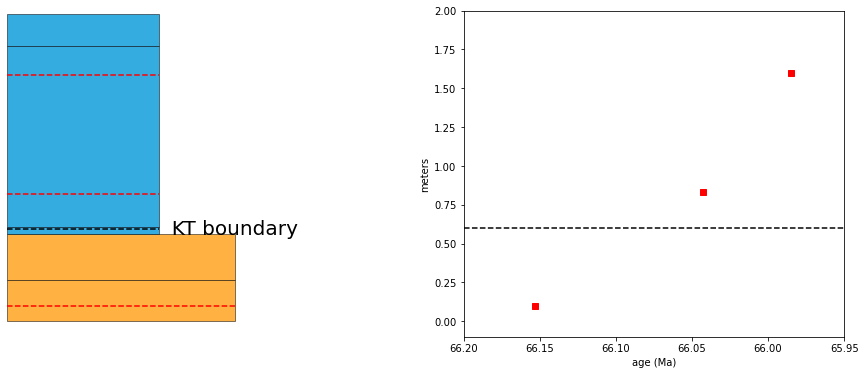

In [62]:
boxes, liths, _ = plot_ash()

<span style='color:dodgerblue'>What is the age of the <i>KT Boundary</i>? What ages are possible? What ages are most likely?</span>

##### Building an age model 
<span style='font-size:.6em'>Starting simple since we cant assume slow then fast is any more likely than fast then slow. Considering a constant sedimentation rate (a linear interpolation)..</span>

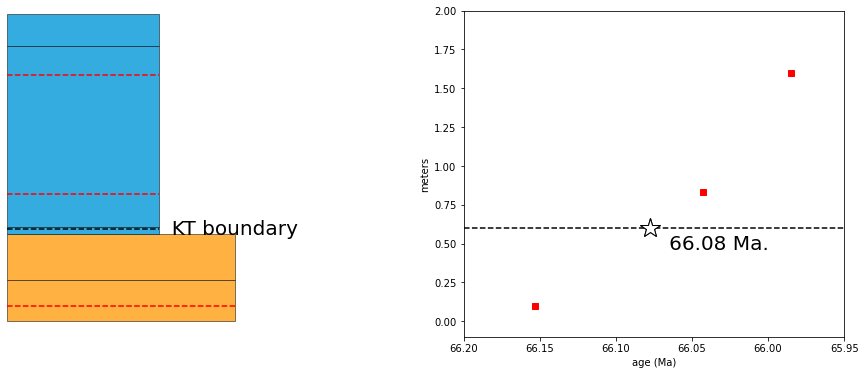

In [63]:
_,_, fig = plot_ash(boxes=boxes,liths=liths)
#calculate KT age
ax = fig.axes[-1]
KT_age=calc_age(ash_table,KT)
ax.plot([KT_age,KT_age],[KT,KT],'w*',mec='k',markersize=20)
_=ax.text(KT_age,KT-.1,'   %2.2f Ma.' % (KT_age),horizontalalignment='left',verticalalignment='center',fontsize=20)  

<span style='color:dodgerblue'>Even with the simple model.. what havn't we considered?</span>

##### Building an age model 
<span style='font-size:.6em'>Starting simple since we cant assume slow then fast is any more likely than fast then slow. Considering a constant sedimentation rate (a linear interpolation)..</span>

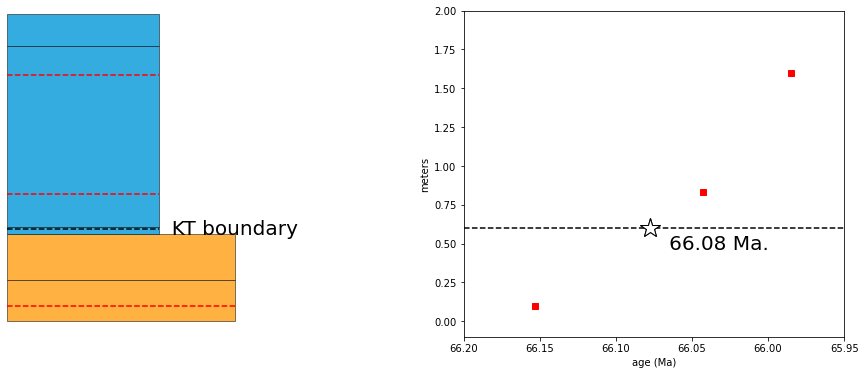

In [64]:
_,_, fig = plot_ash(boxes=boxes,liths=liths)
#calculate KT age
ax = fig.axes[-1]
KT_age=calc_age(ash_table,KT)
ax.plot([KT_age,KT_age],[KT,KT],'w*',mec='k',markersize=20)
_=ax.text(KT_age,KT-.1,'   %2.2f Ma.' % (KT_age),horizontalalignment='left',verticalalignment='center',fontsize=20)

<span style='color:dodgerblue'>Even with the simple model.. what havn't we considered?</span> <span style='color:firebrick'>Uncertainty in the geochronology</span>

##### Building an age model 


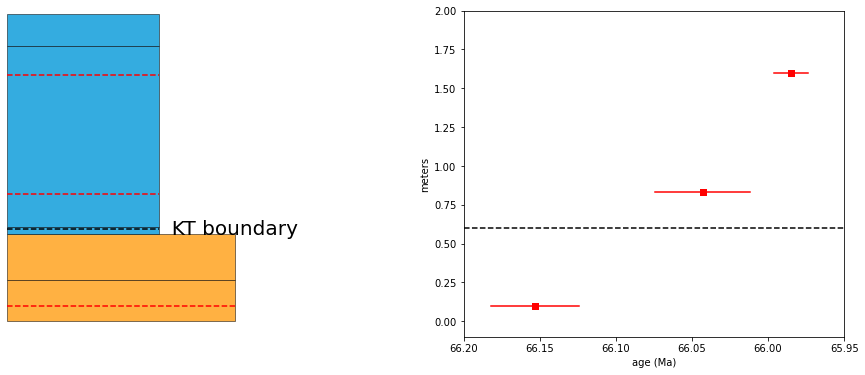

In [65]:
_,_, fig = plot_ash(boxes=boxes,liths=liths)
ax = fig.axes[-1]
for a in ashes:
    ax.plot(ashes[a]['age'],ashes[a]['height'],'rs')
    ax.plot([ashes[a]['age']+ashes[a]['2sd'],ashes[a]['age']-ashes[a]['2sd']],
            [ashes[a]['height'],ashes[a]['height']],'r-')

##### Building an age model 
<span style='font-size:.6em;color:dodgerblue'>How can we describe the uncertainty of the ash ages?</span>

<div style='height:65vh'><br></div>

##### Building an age model 

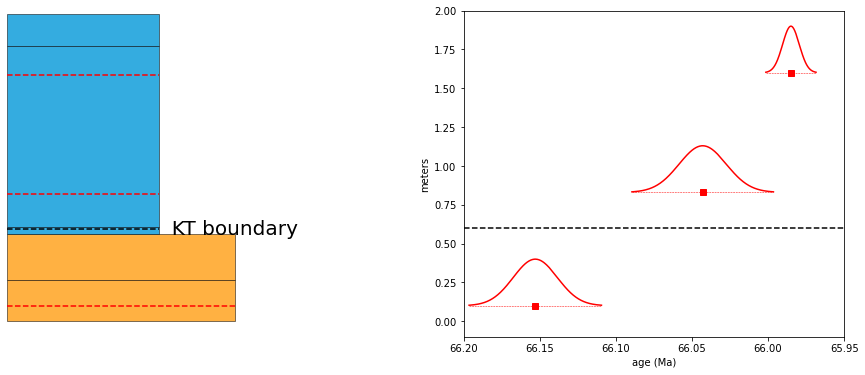

In [66]:
_,_, fig = plot_ash(boxes=boxes,liths=liths)
ax = fig.axes[-1]
for a in ashes:
    mu=ashes[a]['age'] #normal distribution
    sigma=ashes[a]['2sd']/2 
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 300)
    distro=stats.norm.pdf(x, mu, sigma) #scaled for display
    distro=distro/max(distro)*0.3
    ax.plot(x, distro+ashes[a]['height'],'r')
    #ash strat height
    ax.plot([ashes[a]['age']+ashes[a]['2sd']*3/2,ashes[a]['age']-ashes[a]['2sd']*3/2],
            [ashes[a]['height'],ashes[a]['height']],'r--',lw=0.5)

##### Building an age model 
<span style='font-size:.6em;color:dodgerblue'>How do we include these <i>normally distributed</i> uncertainties into our constant sedimentation rate age model?</span>

Consider..

$$ Z = (Y\pm\sigma_Y) + (X\pm\sigma_X) $$ 

What is Z? What is $\sigma_Z$?

##### Building an age model 
<span style='font-size:.6em;color:dodgerblue'>How do we include these <i>normally distributed</i> uncertainties into our constant sedimentation rate age model?</span>

Consider..

$$ Z = (Y\pm\sigma_Y) + (X\pm\sigma_X) $$ 

What is Z? <span style='color:firebrick'>(sum of the means)</span> What is $\sigma_Z$? <span style='color:firebrick'>(square root of $\Sigma\sigma^2$)</span>

In [67]:
import numpy as np
Y = np.random.normal(2,.3,1000000)
X = np.random.normal(20,.2,1000000)
Z = Y + X
print(f"""Mean of Z: {np.mean(Z):.1f} and standard deviation of Z: {np.std(Z):.2f}
Analytical stdev: {(.3**2+.2**2)**(1/2):.2f}""")

Mean of Z: 22.0 and standard deviation of Z: 0.36
Analytical stdev: 0.36


##### Building an age model 
<span style='font-size:.6em;color:dodgerblue'>How do we include these <i>normally distributed</i> uncertainties into our constant sedimentation rate age model?</span>

Consider..

$$ Z = (Y\pm\sigma_Y) \times (X\pm\sigma_X) $$ 

What is Z? What is $\sigma_Z$?

##### Building an age model 
<span style='font-size:.6em;color:dodgerblue'>How do we include these <i>normally distributed</i> uncertainties into our constant sedimentation rate age model?</span>

Consider..

$$ Z = (Y\pm\sigma_Y) \times (X\pm\sigma_X) $$ 

What is Z? <span style='color:firebrick'>(product of the means)</span> What is $\sigma_Z$? <span style='color:firebrick'>(square root of the sum of the relative errors squared times mean of Z)</span>

$$ \frac{\sigma_Z}{Z} \approx \left(\left(\frac{\sigma_Y}{Y}\right)^2 + \left(\frac{\sigma_X}{X}\right)^2\right)^\frac{1}{2} $$ 

In [68]:
import numpy as np
Y = np.random.normal(2,.3,1000000)
X = np.random.normal(20,.2,1000000)
Z = Y * X
print(f"""Mean of Z: {np.mean(Z):.1f} and standard deviation of Z: {np.std(Z):.1f}
Analytical stdev: {np.mean(Z)*((0.3/2)**2+(0.2/20)**2)**(1/2):.2f}""")

Mean of Z: 40.0 and standard deviation of Z: 6.0
Analytical stdev: 6.01


##### Building an age model 
Let's apply these rules to linear interpolation:

$$\mathrm{
\dfrac{A_{KT}-A_{0}}{H_{KT}-H_{0}}=\dfrac{A_{1}-A_{0}}{H_{1}-H_{0}}\\}$$

##### Building an age model 
Let's apply these rules to linear interpolation:

$$\mathrm{
\dfrac{A_{KT}-A_{0}}{H_{KT}-H_{0}}=\dfrac{A_{1}-A_{0}}{H_{1}-H_{0}}\\
A_{KT}=\left(\dfrac{A_{1}-A_{0}}{H_{1}-H_{0}}\right)(H_{KT}-H_{0})+A_{0}\\
}$$

##### Building an age model 
Let's apply these rules to linear interpolation:

$$\mathrm{
\dfrac{A_{KT}-A_{0}}{H_{KT}-H_{0}}=\dfrac{A_{1}-A_{0}}{H_{1}-H_{0}}\\
A_{KT}=\left(\dfrac{A_{1}-A_{0}}{H_{1}-H_{0}}\right)(H_{KT}-H_{0})+A_{0}\\
A_{KT}=\left(\dfrac{\color{red}{A_{1}-A_{0}}}{H_{1}-H_{0}}\right)(H_{KT}-H_{0})+\color{red}{A_{0}}\\
}
$$

##### Building an age model 
Let's apply these rules to linear interpolation:

$$\mathrm{
\dfrac{A_{KT}-A_{0}}{H_{KT}-H_{0}}=\dfrac{A_{1}-A_{0}}{H_{1}-H_{0}}\\
A_{KT}=\left(\dfrac{A_{1}-A_{0}}{H_{1}-H_{0}}\right)(H_{KT}-H_{0})+A_{0}\\
A_{KT}=\left(\dfrac{\color{red}{A_{1}-A_{0}}}{H_{1}-H_{0}}\right)(H_{KT}-H_{0})+\color{red}{A_{0}}\\
\\
\sigma A_{kt}^2=\left((\sigma A_{0}^2 + \sigma A_{1}^2)^\frac{1}{2}\times\frac{H_{KT}-H_{0}}{H_{1}-H_{0}}\right)^2 + \sigma A_{0}^2}$$

In [ ]:
term1_sigma = ((ashes["ash1"]["2sd"] / 2) ** 2 + (ashes["ash1"]["2sd"] / 2) ** 2) ** (1 / 2)
term1_sigma = term1_sigma/(ashes["ash2"]['height'] - ashes["ash1"]["height"])
term1_sigma = term1_sigma*(KT - ashes["ash1"]["height"])
total_sigma = (term1_sigma**2 + (ashes["ash1"]["2sd"] / 2) ** 2)**(1/2)

# ((((ashes["ash1"]["2sd"] / 2) ** 2 + (ashes["ash1"]["2sd"] / 2) ** 2) ** (1 / 2) * (
#    1
# ) / (ashes["ash2"]['height'] - ashes["ash1"]["height"])*( KT - ashes["ash1"]["height"]))**2+(ashes["ash1"]["2sd"] / 2) ** 2)**(1/2)

In [69]:
age = (
    lambda ashes, ktH: (ashes["ash2"]["age"] - ashes["ash1"]["age"])
    / (ashes["ash2"]["height"] - ashes["ash1"]["height"])
    * (ktH - ashes["ash1"]["height"])
    + ashes["ash1"]["age"]
)

In [70]:
draws = []
for i in range(10000):
    simulated_ash = {
        "ash1": {
            "height": 0.1,
            "age": np.random.normal(66.153, 0.029 / 2),
            "2sd": 0.029,
        },
        "ash2": {
            "height": 0.83,
            "age": np.random.normal(66.043, 0.031 / 2),
            "2sd": 0.031,
        },
        "ash3": {
            "height": np.random.normal(66.153, 0.011 / 2),
            "age": 65.985,
            "2sd": 0.011,
        },
    }
    draws.append(age(simulated_ash, KT))
print(np.std(draws))

0.011619603147695575


Text(0, 0.5, 'Upper ash age')

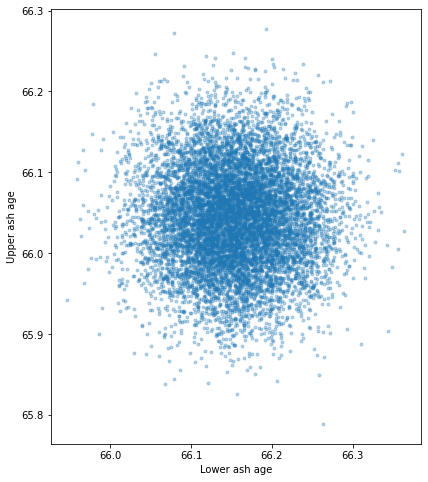

In [71]:
plt.figure(figsize=(8,8))
a1 = np.random.normal(66.153, 0.029 * 2, 10000)
a2 = np.random.normal(66.043, 0.031 * 2, 10000)
plt.plot(a1,a2,'.',alpha=.3)
plt.gca().set_aspect('equal')
plt.gca().set_xlabel('Lower ash age') 
plt.gca().set_ylabel('Upper ash age')

Text(0, 0.5, 'Upper ash age')

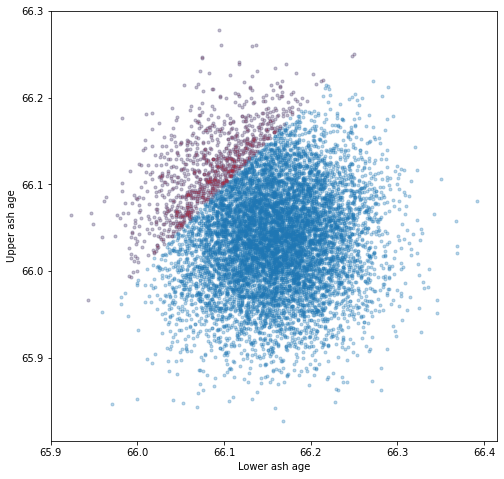

In [72]:
plt.figure(figsize=(8, 8))
a1 = np.random.normal(66.153, 0.029 * 2, 10000)
a2 = np.random.normal(66.043, 0.031 * 2, 10000)
plt.plot(a1, a2, ".", alpha=0.3)
plt.plot(a1[a1 < a2], a2[a1 < a2], "r.", alpha=0.1)
plt.gca().set_aspect("equal")
plt.gca().set_xlabel("Lower ash age")
plt.gca().set_ylabel("Upper ash age")

##### Building an age model 
<span style='color:dodgerblue'>How do we include these <i>normally distributed</i> uncertainties into our constant sedimentation rate age model?</span>
- Even in our simple model the uncertainty is not exactly normal (there is covariation)
- Random number generators allow us account to account for these more complicated forms of uncertainty (Monte Carlo methods)

# Power of Monte Carlo approaches

<center>
    <div style='width:100wh;'>
	    <img src="./images/c14_calibration.png" style='width:100wh'>
    </div>
</center>

# How many samples is enough?

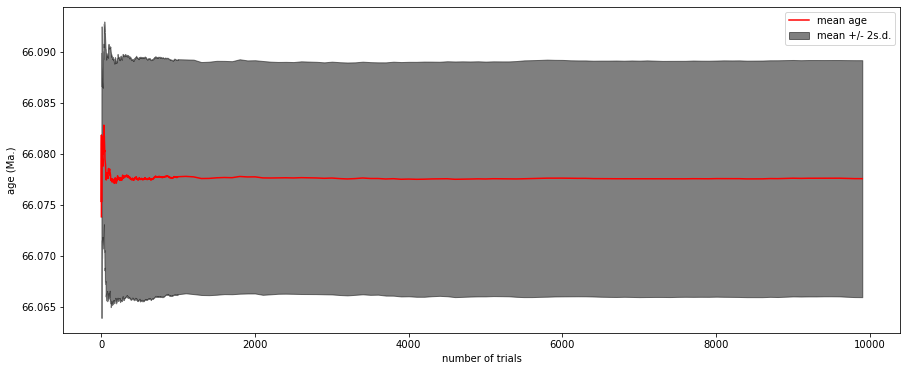

In [77]:
fig=plt.figure(1,figsize=(15,6))
ax=fig.add_subplot(111)
idx=list(range(1000)) +list(range(1000,len(KT_ages)+1,100))
#statistics of KT age as function of number of trials
KT_evolve=[]
for i in idx[:10000]: #more trials here
    KT_evolve.append((np.mean(KT_ages[0:i+1]),np.std(KT_ages[0:i+1]),len(KT_ages[0:i+1])))
KT_evolve=np.array(KT_evolve)
#plot the results
ax.plot(KT_evolve[:,2],KT_evolve[:,0],'r-',label='mean age')
ax.fill_between(KT_evolve[:,2],KT_evolve[:,0]+KT_evolve[:,1],KT_evolve[:,0]-KT_evolve[:,1],
                color='k',alpha=0.5,zorder=0,label='mean +/- 2s.d.')
ax.set_ylabel('age (Ma.)'); ax.set_xlabel('number of trials');_=ax.legend(loc='best')

# Constant sedimentation rate assumption

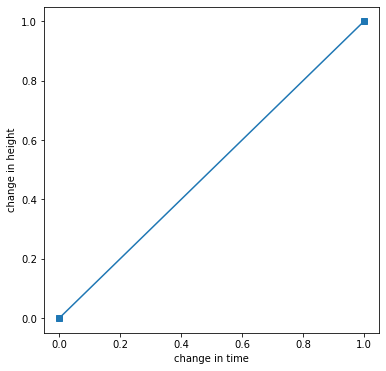

In [78]:
def make_path(pts,g_shape,g_scale,delta):
    #separate a number of points (X) along a [0,1] path
    if pts!=0:
        #X numbers are drawn from a gamma distribution (G)
        #--> these represent the distances between successive points
        path=np.cumsum(np.random.gamma(g_shape,g_scale, pts))
    else:
        path=[1]#if X = 0, then path is simply [0,1]
    path=np.hstack((0,path))#add 0 as the path beginning
    #scale first to be between 0 and 1, and then 0 to delta
    path=path/path[-1]*delta
    return(path)

fig=plt.figure(1,figsize=(6,6)); ax=fig.add_subplot(111)
#assumes constant sedimentation rate between anchors
ax.plot([0,1],[0,1],'-s');ax.set_xlabel('change in time'); _=ax.set_ylabel('change in height')

# Constant sedimentation rate assumption
- goal in lab tomorrow: how can we get away from the assumption of constant sedimentation rate? what *should* it look like?

In [74]:
def make_paths(ashes,num):
    paths=np.zeros((num,len(ashes)))
    for i,a in enumerate(ashes):
        mu=ashes[a]['age']
        sigma=ashes[a]['2sd']/2
    
        picks=np.random.normal(mu,sigma,num)
    
        paths[:,i]=picks
        
    idx=np.where(np.diff(paths)>0)[0]
    mask = np.ones(len(paths), dtype=bool)
    mask[idx]=False
    paths=paths[mask]

    return paths

#Markov Chain Monte Carlo age paths
paths=make_paths(ashes,1000000)

#KT age calculations
paths=make_paths(ashes,10000)
age_models=age_models=[interp1d([ashes[a]['height'] for a in ashes],p) for p in paths]
KT_ages=[a(KT) for a in age_models]
  
# #this also works .... its actually faster, but you do not get the full age model (just age of a specific boundary)
# KT_ages=[]
# for p in paths:
#     ash_table=np.array(list(zip(p,[ashes[a]['height'] for a in ashes])))
#     KT_age=calc_age(ash_table,KT)
#     KT_ages.append(KT_age)

In [ ]:
#Markov Chain Monte Carlo selection of ages
def age_pick(ages,num):
    #number of proposed ages
    picks=np.zeros((num,len(ages)))
    #loop through data (OLDEST-->YOUNGEST)
    for i,a in ages.iterrows():
        #define mean and 1 sigma
        mu=a['age']
        sigma=a['2sd']/2
        #draw an age (assumes underlying Gaussian distribution)
        tmp_pick=np.random.normal(mu,sigma,num)
        #record picked age
        picks[:,i]=tmp_pick
    #find proposals that violate Steno
    idx=np.where(np.diff(picks)>0)[0]
    #filter out offending proposal
    mask = np.ones(len(picks), dtype=bool)
    mask[idx]=False
    picks=picks[mask]

    return picks

#compound Poisson-Gamma process age models
def make_age_model(ages,picks,p_lam,g_shape,g_scale,num_interp):
    #list container for age models
    true_paths=[]
    
#    #ALTERNATE WAY TO INTERPOLATE AGE MODELS
#    h_interp=[]
#    interp_round=1
    
    #loop through valid proposals (N x n) for (age,position) data (n x 2)
    for i,p in enumerate(picks):
        #make pairs of ages and positions:
        #--> (a0,a1) - (h0,h1)
        #--> (a1,a2) - (h1,h2)
        #-->        ....
        #--> (an-1,an) - (hn-1, hn)
        tmp_pick=list(zip(p[0:-1].tolist(),
                          p[1:].tolist(),
                          ages['position'][0:-1].tolist(),
                          ages['position'][1:].tolist()))
        #container list for age model for this particular proposal
        path=[]
        for j,tp in enumerate(tmp_pick):
            #number of knots (K) between (ax,ax+1) - (hx,hx+1)
            #--> number of sedimentation rates = K+1
            pts=np.random.poisson(p_lam, 1)[0]
            #age along knotted line
            t_path=tp[0]-make_path(pts,g_shape,g_scale,tp[0]-tp[1])
            #position along knotted line
            h_path=tp[2]+make_path(pts,g_shape,g_scale,tp[3]-tp[2])

#            #ALTERNATE WAY TO INTERPOLATE AGE MODELS
#            h_interp=h_interp+list(h_path)
            
            #grow the full age model from bottom to top-1
            if j!=len(tmp_pick)-1:
                path.extend(list(zip(t_path,h_path))[0:-1])
            #if this is the last leg, need bottom to top
            else:
                path.extend(list(zip(t_path,h_path)))
        #record the completed age model
        path=np.array(path)
        true_paths.append(path)
    #hacky way to make age model interpolatable
    #--> define (num_interp * n) position points between the bottom and top positions
    #--> n is the number of ages
    h_interp=np.linspace(min(ages['position']),max(ages['position']),num_interp*len(ages))
    
#    #ALTERNATE WAY TO INTERPOLATE AGE MODELS
#    h_interp=np.array(list(set([np.round(h,interp_round) for h in h_interp])))
#    h_interp=np.sort(h_interp)
    
    #containers for interpolated paths and age interpolators
    interp_paths=[]
    age_models=[]
    for i,p in enumerate(true_paths):
        #1D interpolator for this particular age path
        func=interp1d(p[:,1],p[:,0])
        age_models.append(func)
        #interpolated path
        #--> each age path is now same length (num_interp * n)
        #--> allows for statistics (below)
        age_interp=func(h_interp)
        interp_paths.append(age_interp)
        
    #percentile statistics on interpolated age paths
    prcnts=[0,2.5,16,50,84,97.5,100]
    path_stats=np.zeros((len(h_interp),len(prcnts)+1))
    for i in range(len(prcnts)):
        path_stats[:,i+1]=np.percentile(interp_paths,prcnts[i],axis=0)
    #record interpolated position array for easy plotting
    path_stats[:,0]=h_interp
    #make into DataFrame
    path_stats=pd.DataFrame(path_stats,columns=['position']+[str(a) for a in prcnts])

    return true_paths,interp_paths,path_stats,age_models

In [ ]:
fig=plt.figure(1,figsize=(12,6)); gs = fig.add_gridspec(1,4); ax=fig.add_subplot(gs[0])
ax,trace,boxes,liths=rando_strat(ax,num_box=5,height=2,boxes=boxes,liths=liths) #stratigraphy for fun
ax=fig.add_subplot(gs[1:])
#statistics on interpolated ages
ax.fill_betweenx(path_stats['position'],path_stats['2.5'],path_stats['97.5'],color='k',edgecolor='none',alpha=0.3,zorder=0)
#plot age constraints
for i,a in KTashes.iterrows():
    ax.plot([a['age']+a['2sd'],a['age']-a['2sd']],
            [a['position'],a['position']],'k-',lw=2)
#     ax.plot(np.mean(KT_picks[:,i]),a['position'],'r+',alpha=0.5,markersize=10)
#     ax.plot([np.mean(KT_picks[:,i])+2*np.std(KT_picks[:,i]),np.mean(KT_picks[:,i])-2*np.std(KT_picks[:,i])],
#            [a['position'],a['position']],'r-',lw=3,alpha=0.5)
#plot and label KT age
ax.text(KT['age']-KT['2sd'],KT['position'],'   %2.2f$\pm$%2.2f Ma.' % (KT['age'],KT['2sd']),fontsize=15,horizontalalignment='left',verticalalignment='center')
ax.plot([KT['age']+KT['2sd'],KT['age']-KT['2sd']],
        [KT['position'],KT['position']],'k--',lw=2); ax.plot(KT['age'],KT['position'],'w*',mec='k',markersize=20)
ax.set_xlim([66.2,65.95]);ax.set_xlabel('age (Ma.)');_=ax.set_ylabel('height (m)')

# Constant sedimentation rate assumption

In [ ]:
fig=plt.figure(1,figsize=(6,6)); ax=fig.add_subplot(111); 
ax.set_xlabel('change in time'); _=ax.set_ylabel('change in height')
num_paths=200 #add knots to the path
for i in range(num_paths):
    pts=np.random.poisson(5, 1)[0] #discrete integer
    t_path=make_path(pts,1,1,1) #age change between knots
    h_path=make_path(pts,1,1,1) #position change between knots
    ax.plot([0]+list(np.cumsum([1/pts]*pts)),[0]+list(np.cumsum([1/pts]*pts)),'-s')
#     ax.plot(t_path,h_path,'-s') #plot the path
    #plot many paths
    ax.plot(t_path,h_path,'k-',lw=0.5,alpha=0.25) 

# Constant sedimentation rate assumption

In [ ]:
...
for i in range(num_paths):
    pts=np.random.poisson(5, 1)[0] #discrete integer
    ...

**Poisson distribution** is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event.

**Exponential distribution** is the probability distribution of the time between events in a *Poisson point process*

- approach: between our two anchors, randomly insert N points
- now its a line with N+1 segments
- 1st still assume constant sedimentation rate
    - but we can allow sed rate to vary ...
- 2nd allow sed rate to vary
    - one path, two paths, 5 paths
- 3rd look at 1000 paths

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
fig=plt.figure(figsize=(10,10))
a = np.random.uniform(0,1,100000)
b = a<0.1  
sns.kdeplot(np.diff(np.where(b)[0]),color=sns.color_palette('deep')[2],fill=True,lw=3)
c = np.random.exponential(10,100000)
sns.kdeplot(c,color=sns.color_palette('deep')[1],fill=True,lw=3)
sns.despine()

# Deciding on number of sedimentation rate changes

In [ ]:
#number of timesteps
t=200000
#probability of change
prob=0.25
#start with sediment on
state=1
#switch state
sed=np.array([state*-1 if np.random.random()<prob else state for i in range(t)])
#plot the sedimentation rate history
fig=plt.figure(1,figsize=(25,7.5));ax=fig.add_subplot(111)
#plot as timeseries
ax.plot(sed[0:100]); ax.set_ylabel('sediment switch'); _=ax.set_xlabel('time')

- How do we pick number of see rate changes?
- Draw from a Poisson distribution
- For a not quite exact analogy, we can relate to a Poisson process
- What is frequency of sedimentation event duration? 

# Deciding on number of sedimentation rate changes

In [ ]:
sns.histplot(np.random.poisson(1,10000),
             binwidth=1)
_=plt.gca().set_xlabel("discrete events over an interval of time")

In [ ]:
sns.histplot(np.random.exponential(1,10000))
_=plt.gca().set_xlabel('interval of time between events')
# plt.gca().set_yscale('log')

- 1st show on linear scale: exponential
   - Shortest events most common
   - Longer are rare
- 2nd show on a logarithmic one


# Deciding on number of sedimentation rate changes

In [ ]:
fig=plt.figure(1,figsize=(7.5,7.5)); ax=fig.add_subplot(111); 
ax.set_xlabel('change in time'); _=ax.set_ylabel('change in height')
num_paths=1 #add knots to the path
for i in range(num_paths):
    pts=np.random.poisson(5, 1)[0]
    #age change between knots
    t_path=make_path(pts,1,1,1)
    #position change between knots
    h_path=make_path(pts,1,1,1)
#     #plot the knot number
#     ax.plot([0]+list(np.cumsum([1/pts]*pts)),[0]+list(np.cumsum([1/pts]*pts)),'-s')
    #plot the path
    ax.plot(t_path,h_path,'-s')

- so the number of sedimentation rate changes determined from a Poisson distribution
- now we will turn our attention to how we estimate sedimentation rates between these points
- before we do, just using what we know so far, does anyone know how we can force a constant sed rate assumption?
    - 1st is more obvious, make number of points = 0
    - 2nd is make the numbr of points ENORMOUS, lambda = 5000

# Picking sedimentation rates

In [ ]:
# sns.kdeplot(np.random.exponential(2,10000)) #paramer is mean
# sns.kdeplot(np.random.gamma(1,2,10000)) #second parameter is mean, first parameter is n events

In [ ]:
fig=plt.figure(1, figsize=(12,6)); ax=fig.add_subplot(111)
g_shape=1.5; g_loc=0; g_scale=1
gam_hist=np.random.gamma(g_shape,g_scale, 10000) #10K draws with shape = 1.5 and scale = 1
x=np.linspace(0,max(gam_hist),1000) 
gam=stats.gamma.pdf(x,g_shape,g_loc,g_scale) #continuous function
ax.hist(gam_hist,density=True,alpha=0.75,color='#6495ED', 
        label=r'$\lambda$ = %2.1f; $\mu$ = %2.3f' % (g_shape*g_scale,np.mean(gam_hist))); ax.plot(x,gam,'k--')
g_shape=10.5; g_loc=0; g_scale=1 #10K draws with shape = 10.5 and scale = 1
gam_hist=np.random.gamma(g_shape,g_scale, 10000)
x=np.linspace(0,max(gam_hist),1000); gam=stats.gamma.pdf(x,g_shape,g_loc,g_scale) #continuous function
ax.hist(gam_hist,density=True,alpha=0.75,color='#B22222',
        label=r'$\lambda$ = %2.1f; $\mu$ = %2.3f' % (g_shape*g_scale,np.mean(gam_hist))); ax.plot(x,gam,'k--')
#plot labels
ax.set_title('examples of gamma distributions')
ax.legend(); _=ax.text(0.99,0.725,', '.join(['%2.3f' %(g) for g in gam_hist[0:6].tolist()]) + ', ... ',
                       transform=ax.transAxes,horizontalalignment='right',fontsize=15)

- now we need to pick the sedimentation rates along our path
- to do this, for each segment, we need a dh and a dt
- draw both from gamma distributions
- very similar to Poisson distributions, except they are continous
    - blue and red here should look very similar to the blue and red Poisson distros
- 2nd change this parameter to 1, get an exponential distribution (just like the Poisson process experiment)
    - again, red can come from the same math, and we will gain some insight into how this is possible in a sec

# gamma distributions in sedimentology
<center>
    <div style='height:90vh;'>
	    <img src="./images/ribbon_rock2.png" style='height:90vh'>
    </div>
</center>

- gamma distributions are very common in sedimentology and stratigraphy
- this paper showed that the distribution of thicknesses of limestone mud beds followed a gamma distribution

# gamma distributions in sedimentology
<center>
    <div style='height:90vh;'>
	    <img src="./images/ribbon_rock_distros.png" style='height:90vh'>
    </div>
</center>

- logic is the same as what we are after
- have some path, with a start and a stop
    - randomly chop up that path
    - this mimics a Poisson process of building sediment in random increments
    - length of segments = gamma distribtion (exponential distribution)
- used as an argument AGAINST cyclcity (without using time series analysis)

# gamma distributions in sedimentology
<center>
    <div style='height:90vh;'>
	    <img src="./images/PAC_distros.png" style='height:90vh'>
    </div>
</center>

- what happens when we bundle couplets in another Poisson process?
- and bundling is itself a Poisson process
- get towards our red distributions - look more and more Gaussian

# compound Poisson gamma age models

In [ ]:
fig=plt.figure(1,figsize=(7.5,7.5)); ax=fig.add_subplot(111); 
ax.set_xlabel('change in time'); _=ax.set_ylabel('change in height')
num_paths=200 #add knots to the path
for i in range(num_paths):
    pts=np.random.poisson(5, 1)[0]
    #age change between knots
    t_path=make_path(pts,1,1,1)
    #position change between knots
    h_path=make_path(pts,1,1,1)
#     #plot the knot number
#     ax.plot([0]+list(np.cumsum([1/pts]*pts)),[0]+list(np.cumsum([1/pts]*pts)),'-s')
    #plot the path
    ax.plot(t_path,h_path,'k-',lw=0.5,alpha=0.25)
_=ax.plot(t_path,h_path,'-s')

- so throughout the lecture yesterday, we built another type of age model that does not need to assume constant sedimentation rate between two anchors
- called "compound Poisson gamma age models", which is a mouthful
- all it is saying is number of changes in sedimentation rate = drawn from a Poisson distribution
- and those sedimentation rates (defined by dt and dh) = drawn from gamma distributions
- both distrubutions look very similar
    - one discrete, one continuous
    - low mean --> exponential
    - high mean --> Gaussian
- NB: connection back to your problem set:
    - a Poisson *process* can lead to a gamma *distribution*
    - like sedimentation on/off --> thickness of couplets
    - sorry names are confusing!!

# compound Poisson gamma age models

In [ ]:
import pandas as pd
import time
#local way to load data
sluggan=[{'position': 44.5, 'age': 985.0, '2sd': 45.0}, {'position': 49.5, 'age': 1225.0, '2sd': 65.0},
        {'position': 69.0, 'age': 1635.0, '2sd': 75.0}, {'position': 102.0, 'age': 2130.0, '2sd': 45.0},
        {'position': 125.0, 'age': 2930.0, '2sd': 85.0}, {'position': 165.0, 'age': 3945.0, '2sd': 85.0},
        {'position': 185.0, 'age': 4180.0, '2sd': 90.0}, {'position': 232.5, 'age': 4556.666667, '2sd': 76.66666667},
        {'position': 239.0, 'age': 4965.0, '2sd': 75.0}, {'position': 272.5, 'age': 5320.0, '2sd': 65.0},
        {'position': 297.5, 'age': 6760.0, '2sd': 90.0}, {'position': 332.0, 'age': 7855.0, '2sd': 115.0},
        {'position': 367.5, 'age': 8176.666667, '2sd': 65.0},{'position': 407.0, 'age': 8540.0, '2sd': 120.0},
        {'position': 427.0, 'age': 9360.0, '2sd': 150.0},{'position': 447.5, 'age': 9475.0, '2sd': 145.0},
        {'position': 461.0, 'age': 9610.0, '2sd': 130.0},{'position': 484.5, 'age': 10805.0, '2sd': 125.0},
        {'position': 499.0, 'age': 10995.0, '2sd': 160.0},{'position': 509.0, 'age': 11625.0, '2sd': 160.0},
        {'position': 518.0, 'age': 12265.0, '2sd': 125.0}]
print('number of ages: %s' %(len(sluggan)))
#convert list of dictionaries into a DataFrame
sluggan=pd.DataFrame(sluggan)
sluggan['position']=sluggan['position']*-1
sluggan=sluggan.sort_values(by='position')
sluggan=sluggan.reset_index()
sluggan.head()

In [ ]:
#Markov Chain Monte Carlo selection of ages
def age_pick(ages,num):
    #number of proposed ages
    picks=np.zeros((num,len(ages)))
    #loop through data (OLDEST-->YOUNGEST)
    for i,a in ages.iterrows():
        #define mean and 1 sigma
        mu=a['age']
        sigma=a['2sd']/2
        #draw an age (assumes underlying Gaussian distribution)
        tmp_pick=np.random.normal(mu,sigma,num)
        #record picked age
        picks[:,i]=tmp_pick
    #find proposals that violate Steno
    idx=np.where(np.diff(picks)>0)[0]
    #filter out offending proposal
    mask = np.ones(len(picks), dtype=bool)
    mask[idx]=False
    picks=picks[mask]

    return picks

#compound Poisson-Gamma process age models
def make_age_model(ages,picks,p_lam,g_shape,g_scale,num_interp):
    #list container for age models
    true_paths=[]
    
#    #ALTERNATE WAY TO INTERPOLATE AGE MODELS
#    h_interp=[]
#    interp_round=1
    
    #loop through valid proposals (N x n) for (age,position) data (n x 2)
    for i,p in enumerate(picks):
        #make pairs of ages and positions:
        #--> (a0,a1) - (h0,h1)
        #--> (a1,a2) - (h1,h2)
        #-->        ....
        #--> (an-1,an) - (hn-1, hn)
        tmp_pick=list(zip(p[0:-1].tolist(),
                          p[1:].tolist(),
                          ages['position'][0:-1].tolist(),
                          ages['position'][1:].tolist()))
        #container list for age model for this particular proposal
        path=[]
        for j,tp in enumerate(tmp_pick):
            #number of knots (K) between (ax,ax+1) - (hx,hx+1)
            #--> number of sedimentation rates = K+1
            pts=np.random.poisson(p_lam, 1)[0]
            #age along knotted line
            t_path=tp[0]-make_path(pts,g_shape,g_scale,tp[0]-tp[1])
            #position along knotted line
            h_path=tp[2]+make_path(pts,g_shape,g_scale,tp[3]-tp[2])

#            #ALTERNATE WAY TO INTERPOLATE AGE MODELS
#            h_interp=h_interp+list(h_path)
            
            #grow the full age model from bottom to top-1
            if j!=len(tmp_pick)-1:
                path.extend(list(zip(t_path,h_path))[0:-1])
            #if this is the last leg, need bottom to top
            else:
                path.extend(list(zip(t_path,h_path)))
        #record the completed age model
        path=np.array(path)
        true_paths.append(path)
    #hacky way to make age model interpolatable
    #--> define (num_interp * n) position points between the bottom and top positions
    #--> n is the number of ages
    h_interp=np.linspace(min(ages['position']),max(ages['position']),num_interp*len(ages))
    
#    #ALTERNATE WAY TO INTERPOLATE AGE MODELS
#    h_interp=np.array(list(set([np.round(h,interp_round) for h in h_interp])))
#    h_interp=np.sort(h_interp)
    
    #containers for interpolated paths and age interpolators
    interp_paths=[]
    age_models=[]
    for i,p in enumerate(true_paths):
        #1D interpolator for this particular age path
        func=interp1d(p[:,1],p[:,0])
        age_models.append(func)
        #interpolated path
        #--> each age path is now same length (num_interp * n)
        #--> allows for statistics (below)
        age_interp=func(h_interp)
        interp_paths.append(age_interp)
        
    #percentile statistics on interpolated age paths
    prcnts=[0,2.5,16,50,84,97.5,100]
    path_stats=np.zeros((len(h_interp),len(prcnts)+1))
    for i in range(len(prcnts)):
        path_stats[:,i+1]=np.percentile(interp_paths,prcnts[i],axis=0)
    #record interpolated position array for easy plotting
    path_stats[:,0]=h_interp
    #make into DataFrame
    path_stats=pd.DataFrame(path_stats,columns=['position']+[str(a) for a in prcnts])

    return true_paths,interp_paths,path_stats,age_models

# compound Poisson gamma age models

In [ ]:
#RUN AGE MODEL FOR SLUGGAN DATA
tic=time.time()
#pick self-consistent ages (based on Markov Chain Monte Carlo)
num_trials=1000
sluggan_picks=age_pick(sluggan,num_trials)
#define lambda for poisson draws
p_lam=10.5
#define shape and scale for gamma draws
#NB: age model only sensitive to shape
g_shape=1.5
g_scale=1
#number of interpolation points per age anchor
num_interp=1000

#run compound Poission-Gamma age model
true_paths,interp_paths,path_stats,age_models = make_age_model(sluggan,sluggan_picks,p_lam,g_shape,g_scale,num_interp)

#age of demonstration horizon
demo_pos=-315
demo={'position':demo_pos,
      'age':np.mean([a(demo_pos) for a in age_models]),
      '2sd': 2*np.std([a(demo_pos) for a in age_models])}
toc=time.time()      
print(r'number of trials: %s' %(num_trials))
print(r'model run time: %2.2f seconds' % (toc-tic))
print(r'age of %2.2f meters produce by model: %2.0f +/- %2.0f yrs BP' %(demo['position']/100,demo['age'],demo['2sd']))

# compound Poisson gamma age models

In [ ]:
fig=plt.figure(1,figsize=(12,6)); ax=fig.add_subplot(111)
#randomly pick ~100 age models (could be less)
idx=np.random.randint(len(true_paths))
for a in true_paths[idx:idx+100]:
    ax.plot(a[:,0],a[:,1]/100,'-',lw=0.5)
#statistics on interpolated ages
# ax.fill_betweenx(path_stats['position']/100,path_stats['2.5'],path_stats['97.5'],
#                 color='k',edgecolor='none',alpha=0.3,zorder=0)
#plot the median age (constant sed rate)
# ax.plot(path_stats['50'],path_stats['position']/100,'k--',lw=1)
#plot age constraints 
# for i,a in sluggan.iterrows():
#     ax.plot([a['age']+a['2sd'],a['age']-a['2sd']],[a['position']/100,a['position']/100],'k-',lw=2)
#plot age of demo horizon
# ax.plot([demo['age']+demo['2sd'],demo['age']-demo['2sd']],[demo['position']/100,demo['position']/100],'r-',lw=2)
#plot labels
ax.set_xlim([13000,0]); ax.set_xlabel('age (years BP)');_=ax.set_ylabel('depth (m)')

- 1st plot 100 paths and full range of all paths
- 2nd 95% of all paths and an interpolated age
- 3rd plot the median of all paths
- what does this represent?

# compound Poisson gamma age models

In [ ]:
#U-Pb data from Colorado Plateau 
KTashes=[{'position':0.1,
            'age': 66.153,
            '2sd':0.029},
       {'position':0.83,
            'age': 66.043,
            '2sd':0.031},
       {'position':1.6,
            'age': 65.985, #+0.055 --> experiment
            '2sd':0.011}]

#position data is in meters height
KTashes=pd.DataFrame(KTashes)
KTashes=KTashes.sort_values(by='position')
KTashes=KTashes.reset_index()
KTashes.head()

# compound Poisson gamma age models

In [ ]:
#RUN AGE MODEL FOR KT U-Pb DATA
tic=time.time()
#pick self-consistent ages (based on Markov Chain Monte Carlo) 
num_trials=1000
KT_picks=age_pick(KTashes,num_trials)
#define lambda for poisson draws
#NB: if lambda=0, "constant sed rate model" is result
p_lam=0
p_lam=10.5
#define shape and scale for gamma draws
#NB: age model only sensitive to shape
g_shape=1.5
g_scale=1\
#number of interpolation points per age anchor
num_interp=1000
#run compound Poission-Gamma age model
true_paths,interp_paths,path_stats,age_models = make_age_model(KTashes,KT_picks,p_lam,g_shape,g_scale,num_interp)
#age of KT Boundary
KT={'position':0.6,
       'age': np.mean([a(0.6) for a in age_models]),
        '2sd': 2*np.std([a(0.6) for a in age_models])}
toc=time.time()      
print(r'number of trials: %s' %(num_trials))
print(r'model run time: %2.2f seconds' % (toc-tic))
print(r'age of KT boundary produce by model: %2.2f +/- %2.2f Ma.' %(KT['age'],KT['2sd']))

# compound Poisson gamma age models

In [ ]:
fig=plt.figure(1,figsize=(12,6)); gs = fig.add_gridspec(1,4); ax=fig.add_subplot(gs[0])
ax,trace,boxes,liths=rando_strat(ax,num_box=5,height=2,boxes=boxes,liths=liths) #stratigraphy for fun
ax=fig.add_subplot(gs[1:])
#statistics on interpolated ages
ax.fill_betweenx(path_stats['position'],path_stats['2.5'],path_stats['97.5'],color='k',edgecolor='none',alpha=0.3,zorder=0)
#plot age constraints
for i,a in KTashes.iterrows():
    ax.plot([a['age']+a['2sd'],a['age']-a['2sd']],
            [a['position'],a['position']],'k-',lw=2)
#     ax.plot(np.mean(KT_picks[:,i]),a['position'],'r+',alpha=0.5,markersize=10)
#     ax.plot([np.mean(KT_picks[:,i])+2*np.std(KT_picks[:,i]),np.mean(KT_picks[:,i])-2*np.std(KT_picks[:,i])],
#            [a['position'],a['position']],'r-',lw=3,alpha=0.5)
#plot and label KT age
ax.text(KT['age']-KT['2sd'],KT['position'],'   %2.2f$\pm$%2.2f Ma.' % (KT['age'],KT['2sd']),fontsize=15,horizontalalignment='left',verticalalignment='center')
ax.plot([KT['age']+KT['2sd'],KT['age']-KT['2sd']],
        [KT['position'],KT['position']],'k--',lw=2); ax.plot(KT['age'],KT['position'],'w*',mec='k',markersize=20)
ax.set_xlim([66.2,65.95]);ax.set_xlabel('age (Ma.)');_=ax.set_ylabel('height (m)')

- arrive at the same mean age, but uncertainty has been doubled
- with age models, how well we know the answer is just as important as the answer!
- also, more information could be brought into this framework
    - for example, what if this is a shallowing upward cycle, and behaves like our model?

# compound Poisson gamma age models

- can apply the same concept to a much larger scale
- no longer single sections, but an entire geologic Period
- compared to linear model, mean answer is similar, but uncertainty is larger

# Appendix: more on gamma distributions in sedimentology

In [ ]:
#timesteps; probability of change; starting state
t=20000; prob=0.25; state=1
#minimum beds in a parasequence
min_couplet_num=3

#switch state
sed=np.array([state*-1 if np.random.random()<prob else state for i in range(t)])
#find the "on" periods
on=np.where(sed==1)[0]

#find indices of consecutive "on" periods
on_breaks=list(np.where(np.diff(on)!=1)[0]+1)

#group into pairs
on_breaks=[0]+on_breaks+[len(on)]
on_breaks=list(zip(on_breaks[0:-1],on_breaks[1:]))

#calculate lengths of "sediment on" period
on_time=[]
for o in on_breaks:
    on_time.append(len(on[o[0]:o[1]]))
    
#here, the "on" periods are used to bundle couplets
#--> value = number of couplets
on_time=np.cumsum(np.array(on_time)+min_couplet_num-1)
couplet_idx=list(zip(list(on_time[0:-1]),list(on_time[1:])))
couplet_idx=[tuple((0, couplet_idx[0][0]))]+couplet_idx
#generate thickess of those couplets
couplets=np.random.gamma(1,1, couplet_idx[-1][1])
#package them up
bundles=[np.sum(couplets[i[0]:i[1]]) for i in couplet_idx]

# Appendix: more on gamma distributions in sedimentology

In [ ]:
#first hundred couplets for plotting
demo_couplets=list(np.cumsum(couplets)[0:100])
demo_couplets=[0]+demo_couplets
demo_couplets=list(zip(demo_couplets[0:-1],demo_couplets[1:]))
#make thickness vs. height boxes
couplet_boxes=[]
for d in demo_couplets:
    xy=np.array([(0,d[0]),(d[1]-d[0],d[0]),(d[1]-d[0],d[1]),(0,d[1])])
    rect = Polygon(xy,closed=True,facecolor="#"+''.join([np.random.choice([a for a in '0123456789ABCDEF']) for j in range(6)]))
    couplet_boxes.append(rect)
#bundles of couplets
demo_bundles=np.cumsum(bundles)[0:100]
demo_bundles=demo_bundles[demo_bundles<demo_couplets[-1][1]]

# Appendix: more on gamma distributions in sedimentology

In [ ]:
fig=plt.figure(1,figsize=(20,11)); ax=fig.add_subplot(121); ax.plot(sed[0:100],range(100)) #plot sedimentation history
ax.set_ylabel('time'); ax.set_xlabel('sediment switch'); ax.set_xticks([-1.0,1.0]); ax.set_xticklabels(['off','on'])
ax=fig.add_subplot(122); _=[ax.add_patch(r) for r in couplet_boxes] #plot bed thickness vs. height
ax.set_xlim([0,np.ceil(max(couplets[0:100]))]); ax.set_ylim([0,np.ceil(demo_couplets[-1][1])])
ax.set_ylabel('height (meters)');ax.set_xlabel('bed thickness (meters)')
_=[ax.plot(ax.get_xlim(),[d,d],'k--') for d in demo_bundles] #plot the parasequence boundaries
_=ax.text(ax.get_xlim()[1],demo_bundles[0],'parasequence top',horizontalalignment='right',verticalalignment='bottom',fontsize=15)

# Appendix: more on gamma distributions in sedimentology

In [ ]:
#histogram of bed thickness
fig=plt.figure(1,figsize=(20,11)); ax=fig.add_subplot(221)
ax.hist(couplets,bins=30,density=True); ax.set_xlabel('bed thickness (meters)')
#histogram of number of beds in a parasequence
ax=fig.add_subplot(222); ax.hist([i[1]-i[0] for i in couplet_idx],bins=30,density=True); ax.set_xlabel('beds per parasequence')
#histogram of parasequence thickness
ax=fig.add_subplot(212); ax.hist(bundles,bins=30,density=True);_=ax.set_xlabel('parasequence thickness (meters)')